### Business Understanding
The dataset relates to direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal of the campaign was to promote term deposits among clients.

#### Objective:
The primary business objective is to predict whether a client will subscribe to a term deposit. This binary classification problem helps optimize marketing efforts and reduce unnecessary contact with clients.

#### Business Context:
Marketing campaigns are costly and involve human resources.
Predicting the likelihood of a positive client response enables better targeting and higher conversion rates.
The data contains attributes related to the client profile, last contact communication, and social/economic context.
#### Expected Outcome:
A predictive model that accurately identifies likely subscribers, allowing the bank to:

Improve campaign efficiency
Increase ROI on marketing
Enhance customer relationship management
This analysis follows the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology.

#### DATA UNDERSTANDING

In [67]:
import pandas as pd

# Load datasets
df = pd.read_csv("bank-additional-full.csv", sep=';')
data = pd.read_csv("bank_marketing_cleaned.csv", sep=',')

# Dataset shapes
print("Original dataset shape:", df.shape)
print("Enhanced dataset shape:", data.shape)

# First few rows of enhanced dataset
print("\n First 5 rows of enhanced dataset:")
display(data.head())

# Basic info
print("\n Enhanced Dataset Info:")
display(data.info())

# Summary statistics
print("\n Summary statistics for numeric features:")
display(data.describe())

# Check for missing values
print("\n Missing values (as 'unknown') per column:")
unknowns = (data == 'unknown').sum()
display(unknowns[unknowns > 0])

# Unique values in target
print("\n Target variable distribution:")
display(data['y'].value_counts(normalize=True))


Original dataset shape: (41188, 21)
Enhanced dataset shape: (41176, 24)

 First 5 rows of enhanced dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,pdays_clean,previous_capped,campaign_winsorized
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1



 Enhanced Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41176 non-null  int64  
 1   job                  40846 non-null  object 
 2   marital              41096 non-null  object 
 3   education            39446 non-null  object 
 4   default              32580 non-null  object 
 5   housing              40186 non-null  object 
 6   loan                 40186 non-null  object 
 7   contact              41176 non-null  object 
 8   month                41176 non-null  object 
 9   day_of_week          41176 non-null  object 
 10  campaign             41176 non-null  int64  
 11  pdays                41176 non-null  int64  
 12  previous             41176 non-null  int64  
 13  poutcome             41176 non-null  object 
 14  emp.var.rate         41176 non-null  float64
 15  cons.price.

None


 Summary statistics for numeric features:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,pdays_clean,previous_capped,campaign_winsorized
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,1515.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663,0.036793,6.014521,0.169978,2.500291
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184,0.188256,3.824906,0.472108,2.301416
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,3.000000,0.000000,1.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,6.000000,0.000000,2.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,7.000000,0.000000,3.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,27.000000,3.000000,14.000000



 Missing values (as 'unknown') per column:


Series([], dtype: int64)


 Target variable distribution:


y
0    0.887337
1    0.112663
Name: proportion, dtype: float64

In [68]:
print("Available columns:")
print(data.columns.tolist())


Available columns:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'contacted_before', 'pdays_clean', 'previous_capped', 'campaign_winsorized']


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv("bank_marketing_cleaned.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,pdays_clean,previous_capped,campaign_winsorized
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,0,NaN,0,1


In [70]:
data.shape

(41176, 24)

### Data Intake Report

### Basic metadata
num_rows, num_cols = data.shape
num_missing = (data == 'unknown').sum().sum()

### Column data types
column_types = data.dtypes.value_counts()

### Columns with unknowns
unknown_counts = (data == 'unknown').sum()
unknown_columns = unknown_counts[unknown_counts > 0]

### Target distribution
target_dist = data['y'].value_counts(normalize=True)

intake_report = f"""
###  Data Intake Report

**Dataset:** Enhanced Bank Marketing Data  
**Records:** {num_rows}  
**Features:** {num_cols - 1} input features + 1 output (target)

####  Data Types:
- Numeric: {(data.dtypes == 'int64').sum() + (data.dtypes == 'float64').sum()}
- Categorical: {(data.dtypes == 'object').sum()}

####  Missing / Unknown Values:
- Total "unknown" entries: {num_missing}
- Affected Columns:
"""

display(Markdown(intake_report))
display(unknown_columns)

target_summary = f"""
####  Target Variable (`y`) Distribution:
- Yes: {target_dist['yes']*100:.2f}%
- No: {target_dist['no']*100:.2f}%

####  Notes:
- Several features (e.g., job, education, default) contain 'unknown' as a placeholder for missing data.
- The dataset is slightly imbalanced with more 'no' responses.
- The `duration` variable has strong correlation with outcome, but should be excluded from predictive modeling as it leaks information not available before making the call.

"""

display(Markdown(target_summary))


**Target Variable Overview**

In [71]:
data['y'].dtype


dtype('int64')

In [72]:
print(data['y'].isnull().sum())
print(data['y'].unique())


0
[0 1]


### 1. UNIVARIATE ANALYSIS

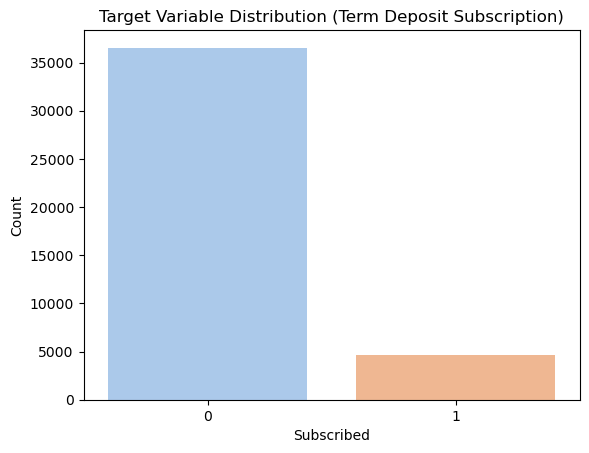

In [73]:
sns.countplot(x='y', data=data, palette='pastel')
plt.title("Target Variable Distribution (Term Deposit Subscription)")
plt.xlabel("Subscribed")
plt.ylabel("Count")
plt.show()


The bar for "0" (not subscribed) is significantly taller, indicating that most customers did not subscribe to the term deposit.

The bar for "1" (subscribed) is much shorter, showing that only a small fraction of customers subscribed.

**Numeric Features Distributions**

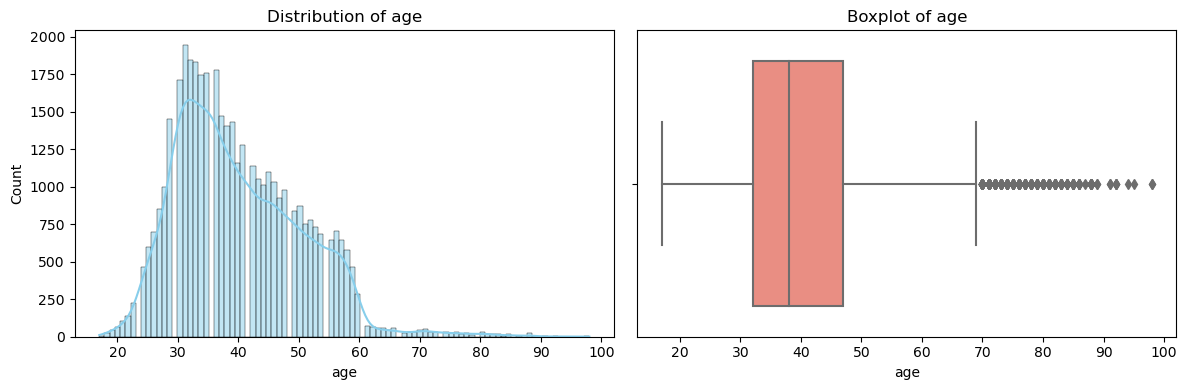

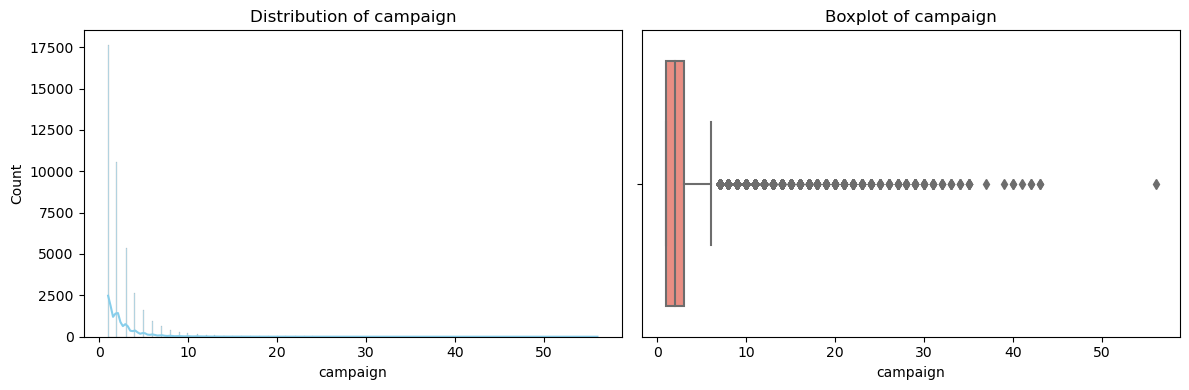

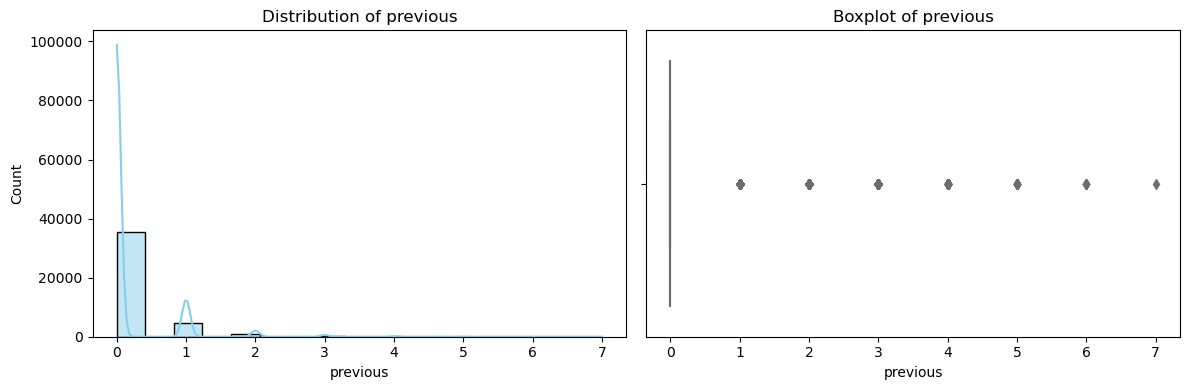

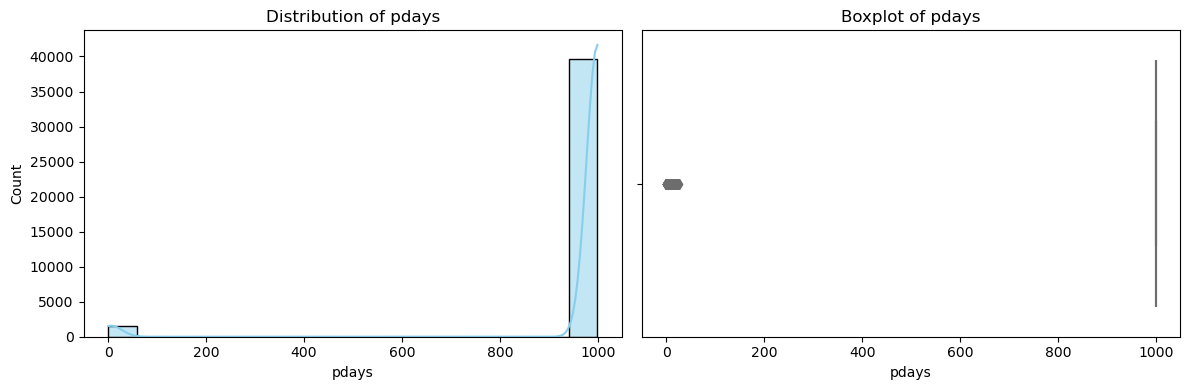

In [74]:
numeric_cols = ['age', 'campaign', 'previous', 'pdays']

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    
    sns.boxplot(x=data[col], ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


Age

The data is skewed toward younger/middle-aged adults, with fewer older individuals. The box plot confirms the skewness and highlights the central tendency and spread.

Campaign

The Histogram shows data is highly right-skewed, indicating most clients received minimal follow-ups, while a tiny subset was contacted excessively.

The boxplot shows Whiskers/Outliers:

    Whiskers may extend to ~10–20 contacts.

    Dots beyond whiskers represent extreme outliers (clients contacted 20+ times).


Pdays

The "pdays" variable has a very skewed distribution, with a lot of people at the extremes—especially at 1000, which often signifies "never contacted since the last campaign."

**Categorical Features vs Subscription Rate**

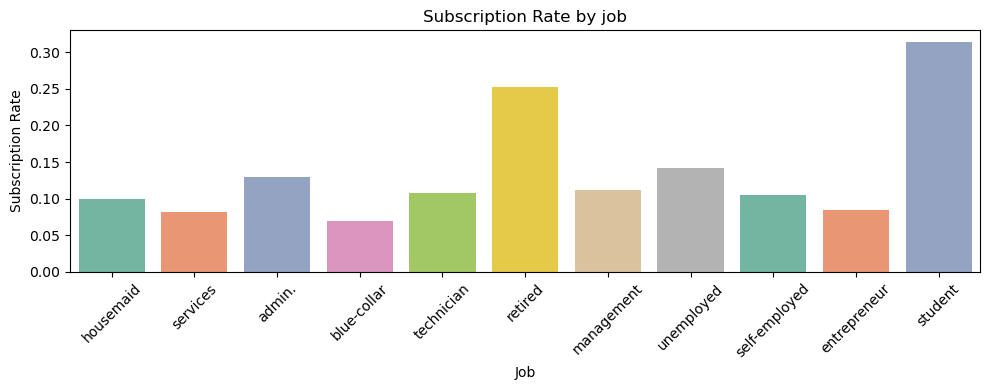

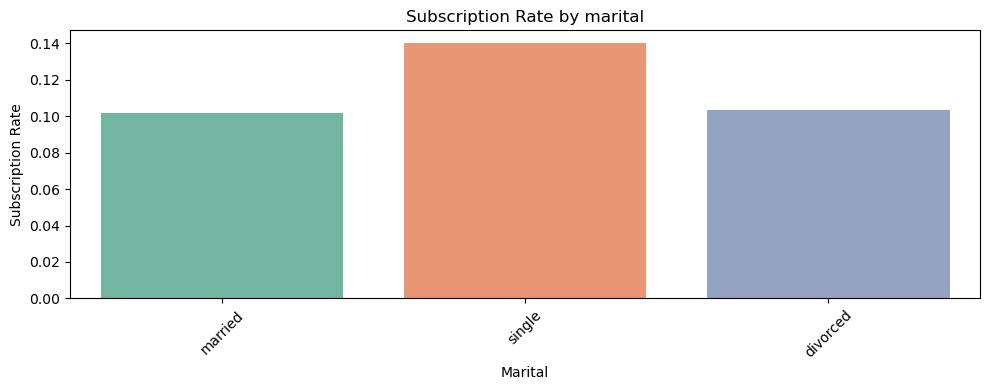

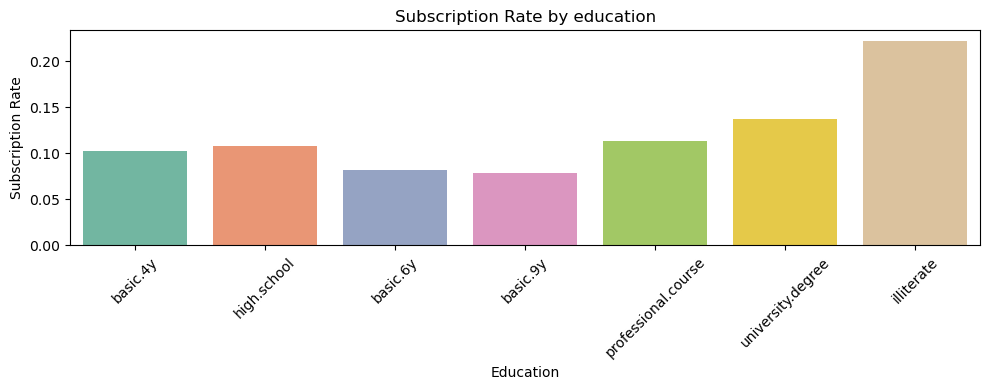

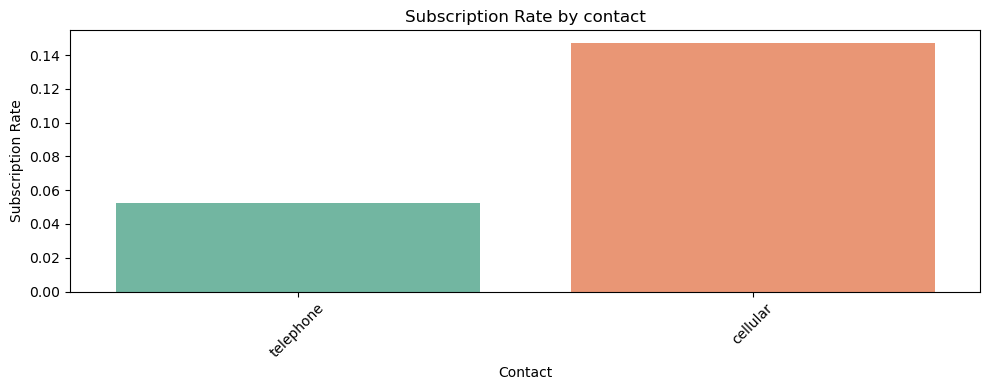

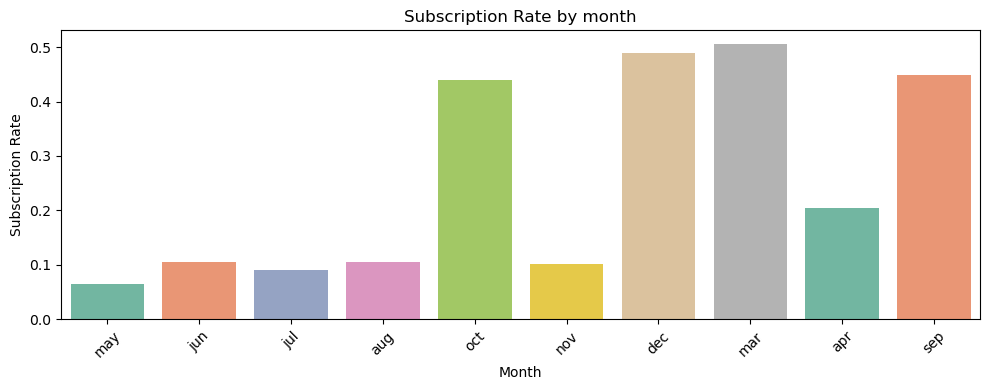

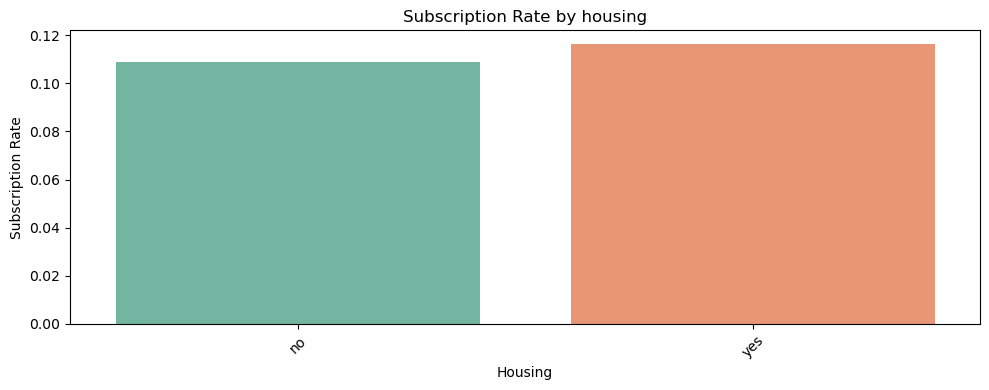

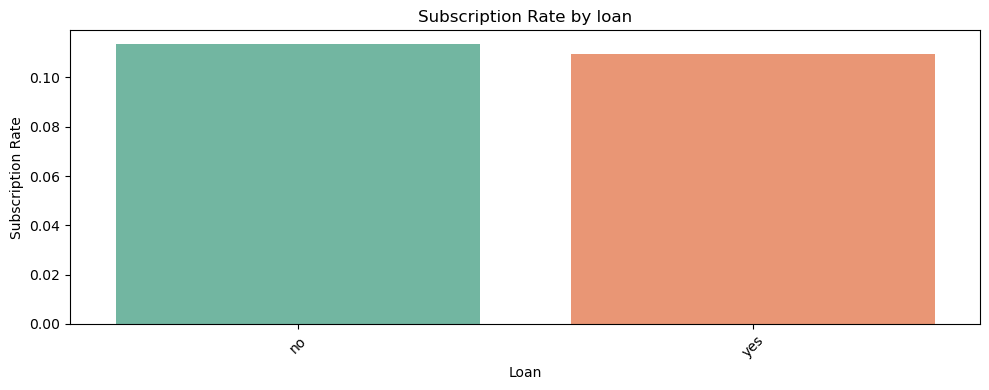

In [75]:
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'housing', 'loan']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=col, y='y', data=data, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Subscription Rate by {col}")
    plt.ylabel("Subscription Rate")
    plt.xlabel(col.capitalize())
    plt.tight_layout()
    plt.show()


Subscription Rate by Jobs: Highest rate(Students) — young, impressionable, potentially seeking savings tools
    
Subscription Rate by Maritals : Highest rate(Single) 

Subscription Rate by Education : Highest rate(illiterate)

Subscription Rate by contact : Highest rate(cellular)

Subscription Rate by loan : Highestst rate(no loan)


    

### 2.BIVARIATE ANALYSIS

  age_group  count
0     17-25   1665
1     26-40  22096
2     41-60  16506
3       60+    909


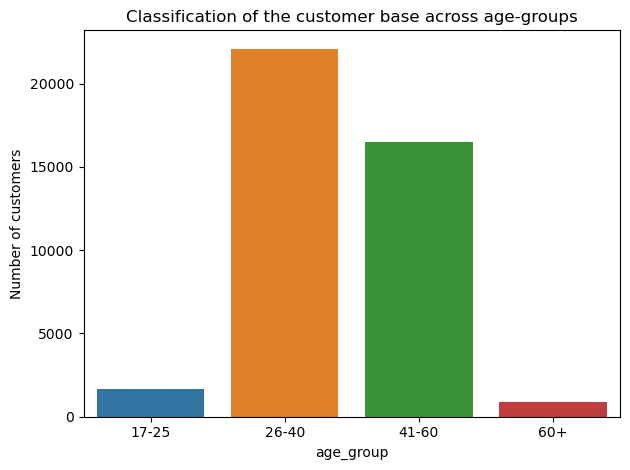

In [76]:
# Adding new age-group column to bank marketing cleaned data
# min = 17, max = 98 yrs
# 17-25, 26-40, 41-60, 60+ yrs
groups = data['age'].apply(lambda x: '17-25' if x<=25 else ('26-40' if x<=40 else ('41-60' if x<=60 else '60+')))
data['age_group'] = groups

age_group_counts = pd.DataFrame(data.groupby('age_group').age.count()).rename({'age':'count'}, axis = 1).reset_index()
print(age_group_counts)

sns.barplot(x = 'age_group', y = 'count', data = age_group_counts)
plt.title('Classification of the customer base across age-groups')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

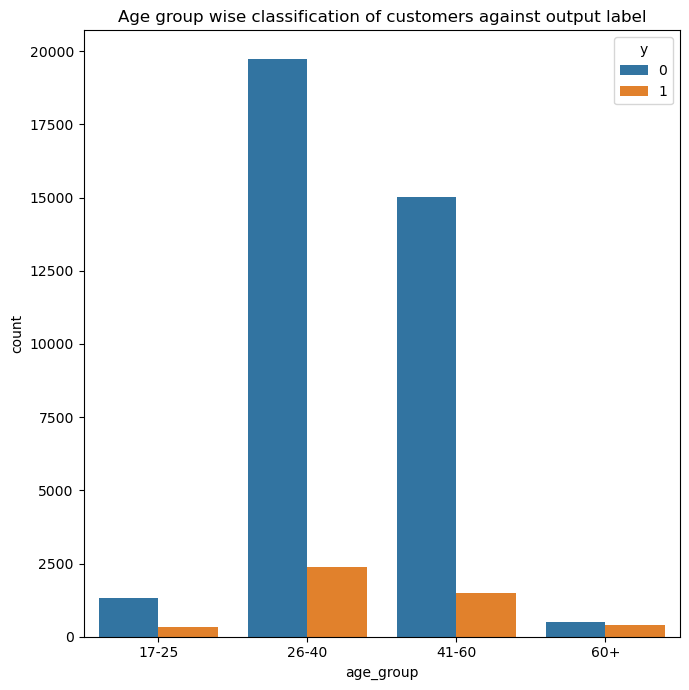

In [77]:
# Looking at relation between different age groups and the output label y

agegroup_y = pd.DataFrame(data.groupby('age_group').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (7,7))
plt.title('Age group wise classification of customers against output label')
sns.barplot(x = 'age_group', y = 'count', hue = 'y', data = agegroup_y)
plt.tight_layout()
plt.show()

In the age-groups of 26-40 and 41-60 yrs, majority of the people are not subscribed to the term deposit plan



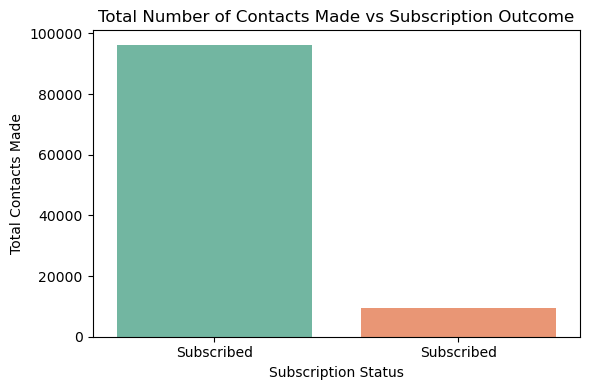

In [78]:
# Group data
camp = data.groupby('y', as_index=False)['campaign'].sum()

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='y', y='campaign', data=camp, palette='Set2')

# Set title and axis labels
plt.title('Total Number of Contacts Made vs Subscription Outcome')
plt.xlabel('Subscription Status')
plt.ylabel('Total Contacts Made')

# Replace x-axis tick labels
ax.set_xticklabels(['Not Subscribed' if label == 'no' else 'Subscribed' for label in camp['y']])

plt.tight_layout()
plt.show()


When more number of contacts is made to the customer, they haven't subscribed to the term deposit plan

  age_group  campaign
0     17-25      4217
1     26-40     56214
2     41-60     43515
3       60+      1789


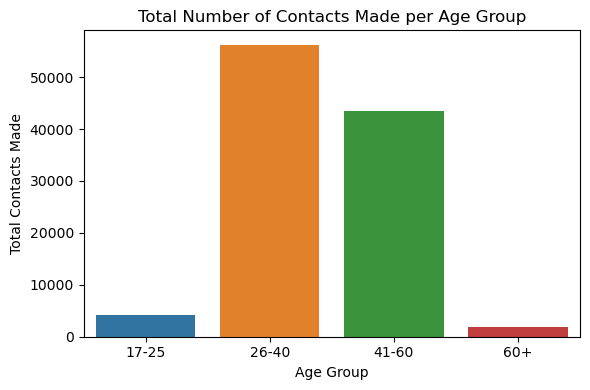

In [79]:
# Grouping by age_group and summing total campaign contacts
ag_camp = data.groupby('age_group', as_index=False)['campaign'].sum()

# Display grouped data
print(ag_camp)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='campaign', data=ag_camp)
plt.title('Total Number of Contacts Made per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Contacts Made')
plt.tight_layout()
plt.show()


The 26-40 and 41-60 age-groups witness majority of the contacts made in this campaign. These two age-groups seem to be the target groups for the bank.

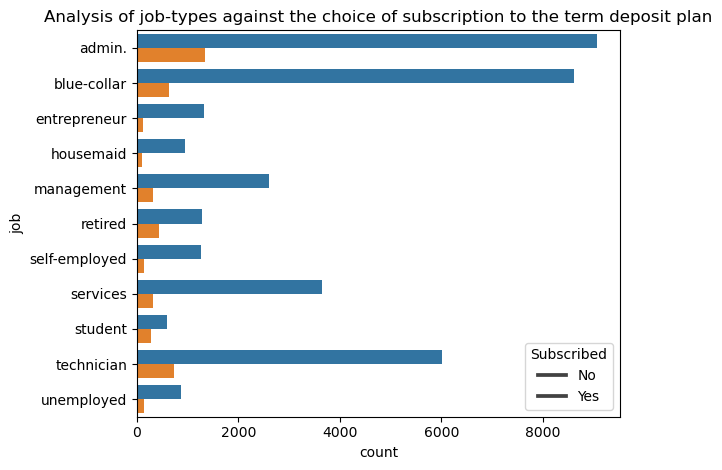

In [80]:
# Looking at relation between job and the output label y

joby = pd.DataFrame(data.groupby('job').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()
plt.title('Analysis of job-types against the choice of subscription to the term deposit plan')
sns.barplot(x = 'count', y = 'job', hue = 'y', data = joby)

plt.legend(title='Subscribed', labels=['No', 'Yes'])  
plt.tight_layout()
plt.show()

Looking at the jobs, 'admin', 'blue-collar' and 'technician' are the prominent jobs and most of the customers in these jobs have rejected the term deposit plan.

### Insights on Contact Behavior ###

**1.Campaign vs Conversion Rate:**

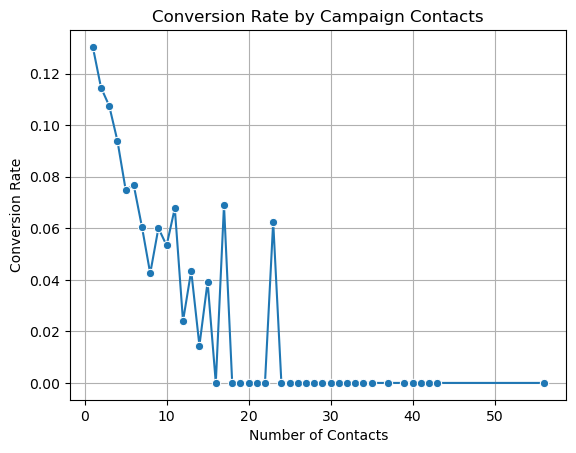

In [81]:
sns.lineplot(
    x='campaign',
    y='y',
    data=data.groupby('campaign')['y'].mean().reset_index(),
    marker='o'
)
plt.title('Conversion Rate by Campaign Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


Conversion rates decline steadily as the number of campaign contacts increases.

At zero contacts, conversion sits high around 12%, but after around 20 contacts, the rate drops to 0% and stays there—even   when contacts reach 50.


    

**3.Conversion Rate by month**

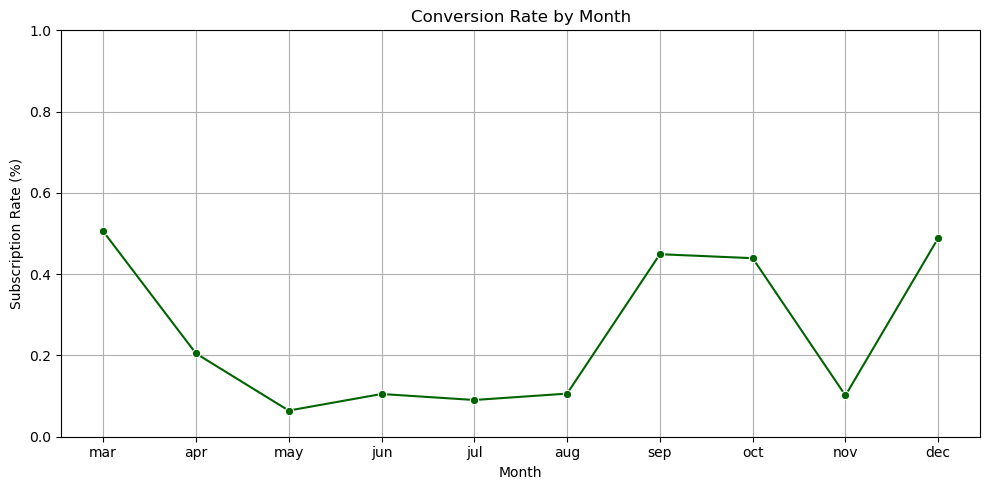

In [82]:

# Ensure month is lowercase and standardized
data['month'] = data['month'].str.lower()

# Define the correct month order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert to categorical for ordered plotting
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# Calculate conversion rate per month
conversion_by_month = data.groupby('month')['y'].mean().reindex(month_order)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=conversion_by_month.index, y=conversion_by_month.values, marker='o', color='darkgreen')
plt.title("Conversion Rate by Month")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Month")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


- March starts strong at ~0.6%, but…
- May is alarmingly low, dipping to ~0.1%—and that’s during the same month we saw the highest contact volume earlier.
- Rates stay flat through June to August, then see a notable rebound in September and October (back to ~0.5%).
- Another dip hits November, followed by a slight recovery in December.


**2.Contacts by Month**

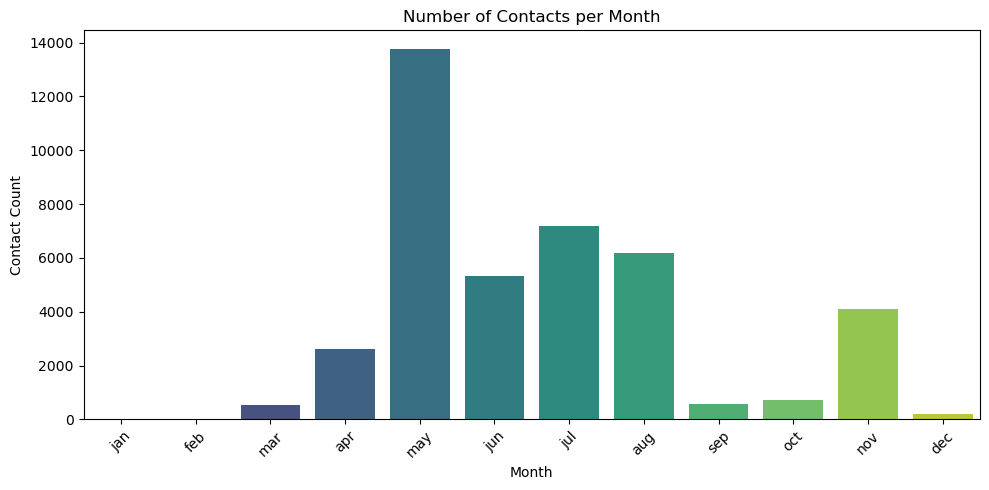

In [83]:

plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=data, order=month_order, palette='viridis')
plt.title("Number of Contacts per Month")
plt.ylabel("Contact Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most contacts were made in may followed by july and august.

### Multivariate Analysis

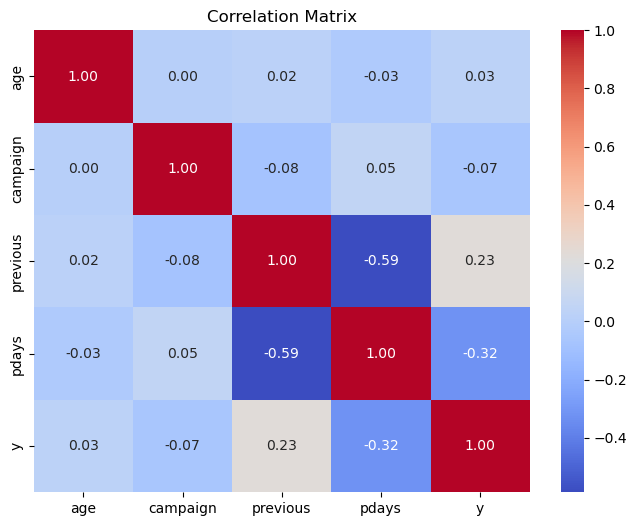

In [84]:
import numpy as np

corr_cols = ['age', 'campaign', 'previous', 'pdays', 'y']
plt.figure(figsize=(8, 6))
sns.heatmap(data[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


Strongest relationship (negative): pdays and previous have a notable negative correlation of -0.59, suggesting that as the number of previous contacts increases, the days since last contact (pdays) tend to decrease

Target variable (y) insights:

previous shows the highest positive correlation with y at 0.23.
pdays has the strongest negative correlation with y at -0.32.
That might hint that recent or more frequent contact increases the likelihood of a positive outcome (like a conversion or response, depending on what y represents).